<a href="https://colab.research.google.com/github/sanyamsh7/Notebooks/blob/main/Exercises03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


df = pd.DataFrame({'years': [1, 2, 3, 4, 5, 6],
                   'salary': [4000, 4250, 4500, 4750, 5000, 5250]})

**Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function.
We can directly find out the value of θ without using Gradient Descent. Following this 
approach is an effective and time-saving option when are working with a dataset with small features**

In [ ]:
m = len(df)
m

6

In [ ]:
X1 = df['years'].values
X1

array([1, 2, 3, 4, 5, 6])

In [ ]:
Y = df['salary'].values
Y

array([4000, 4250, 4500, 4750, 5000, 5250])

In [ ]:
X1.reshape(m, 1)    # changed X1 to a column

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [ ]:
X1 = X1.reshape(m, 1)

In [ ]:
bias = np.ones((m, 1))    # 6x1

In [ ]:
#np.append - used to merge two arrays and original remains same
np.append(bias, X1, axis = 1)

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.]])

In [ ]:
X = np.append(bias, X1, axis = 1)

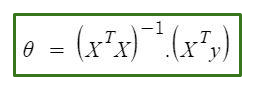

In [ ]:
np.linalg.inv(np.dot(X.T, X))    # first inverse dot product

array([[ 0.86666667, -0.2       ],
       [-0.2       ,  0.05714286]])

In [ ]:
 np.dot(X.T, Y)     # second dot product in the equation

array([ 27750., 101500.])

In [ ]:
coefs  = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
coefs

array([3750.,  250.])

In [ ]:
print(f'Linear regression: {coefs[0]:.2f} + {coefs[1]:.2f}x')


Linear regression: 3750.00 + 250.00x


In [ ]:
# NOW USING SCIKIT LEARN 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.DataFrame({'years': [1, 2, 3, 4, 5, 6],
                   'salary': [4000, 4250, 4500, 4750, 5000, 5250]})

lr  = LinearRegression()
lr.fit(df[['years']], df[['salary']])
print("Linear regression: {} + {}x".format(lr.intercept_[0], lr.coef_[0][0]))

Linear regression: 3750.0 + 250.0x


In [ ]:
import numpy as np
import pandas as pd


np.random.seed(42)
df = pd.DataFrame(data=np.random.randn(10), columns=['var1'])
df

,var1
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
5,-0.234137
6,1.579213
7,0.767435
8,-0.469474
9,0.542560


In [ ]:
# implement sigmoid function using numpy
z = 1/(1+np.exp(-df['var1']))
df['var1_sigmoid'] = z

In [ ]:
#or
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
 
df['var1_sigmoid'] = df['var1'].apply(sigmoid)
print(df)

       var1  var1_sigmoid
0  0.496714      0.621687
1 -0.138264      0.465489
2  0.647689      0.656489
3  1.523030      0.820984
4 -0.234153      0.441728
5 -0.234137      0.441732
6  1.579213      0.829093
7  0.767435      0.682966
8 -0.469474      0.384741
9  0.542560      0.632408


In [ ]:
import numpy as np
import pandas as pd


def entropy(x):
    return np.round(-np.sum(x * np.log2(x)), 4)


df = pd.DataFrame({'val_1': np.arange(0.01, 1.0, 0.1), 'val_2': 1 - np.arange(0.01, 1.0, 0.1)})
df

,val_1,val_2
0,0.01,0.99
1,0.11,0.89
2,0.21,0.79
3,0.31,0.69
4,0.41,0.59
5,0.51,0.49
6,0.61,0.39
7,0.71,0.29
8,0.81,0.19
9,0.91,0.09


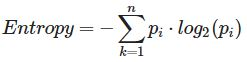

In [ ]:
# find the entropy of both 
for row in df.iterrows():
  print([row[1][0], row[1][1]])

[0.01, 0.99]
[0.11, 0.89]
[0.21000000000000002, 0.79]
[0.31000000000000005, 0.69]
[0.41000000000000003, 0.59]
[0.51, 0.49]
[0.6100000000000001, 0.3899999999999999]
[0.7100000000000001, 0.2899999999999999]
[0.81, 0.18999999999999995]
[0.91, 0.08999999999999997]


In [ ]:
df['entropy'] = [entropy([row[1][0], row[1][1]]) for row in df.iterrows()]
df

,val_1,val_2,entropy
0,0.01,0.99,0.0808
1,0.11,0.89,0.4999
2,0.21,0.79,0.7415
3,0.31,0.69,0.8932
4,0.41,0.59,0.9765
5,0.51,0.49,0.9997
6,0.61,0.39,0.9648
7,0.71,0.29,0.8687
8,0.81,0.19,0.7015
9,0.91,0.09,0.4365


In [19]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [25]:
# create a decision tree classifier 
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
tree.predict(X_test)

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [28]:
np.round(tree.score(X_test, y_test),4)

0.904

In [29]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [32]:
clf = DecisionTreeClassifier(max_depth = 6)
clf.fit(X_train, y_train)
print("Accuracy: {:.4f}".format(clf.score(X_test, y_test)))


Accuracy: 0.9280


In [33]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [34]:
clf = DecisionTreeClassifier(max_depth = 6, min_samples_leaf= 6 )
clf.fit(X_train, y_train)
print("Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

Accuracy: 0.9300
